# **Recommender syetem project(1)**

<table align="center">
  
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1ZffQoyhC2n_bTyUBwow8CDbAj0u1fGW2?authuser=2#scrollTo=MzzwGixxnkj9">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU""  style="padding-bottom:5px;" />
        
  Run this project in Google Colab</a></td>
  
</table>

**In this project we are going to build a very simple recommender system based on the user rating and the correlation between movies. In the end we can take input of a simple movie name and can recommend 5 similar movies to that.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!wget https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/Recommender_system/Data/u1.data

--2020-09-01 17:13:21--  https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/Recommender_system/Data/u1.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1979226 (1.9M) [text/plain]
Saving to: ‘u1.data’

u1.data             100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2020-09-01 17:13:21 (15.6 MB/s) - ‘u1.data’ saved [1979226/1979226]



In [9]:
!wget https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/Recommender_system/Data/Movie_Id_Titles

--2020-09-01 17:14:26--  https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/Recommender_system/Data/Movie_Id_Titles
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49292 (48K) [text/plain]
Saving to: ‘Movie_Id_Titles’

Movie_Id_Titles     100%[===================>]  48.14K  --.-KB/s    in 0.02s   

2020-09-01 17:14:26 (2.29 MB/s) - ‘Movie_Id_Titles’ saved [49292/49292]



In [8]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('u1.data', sep='\t', names=column_names)

In [ ]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


It will be much more meaningful with the use of movie title instead of item id only. lets get the movie title

In [10]:

title = pd.read_csv('Movie_Id_Titles')

In [11]:
title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Lets merge this 

In [15]:
data=pd.merge(data,title,on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Lets Explore the data

In [16]:
tr=pd.DataFrame(data.groupby('title')['rating'].mean())
tr.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
tr['num_of_rating']=data.groupby('title')['rating'].count()
tr.head()

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


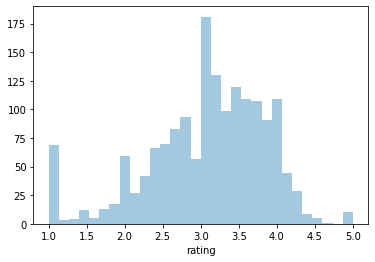

In [18]:
sns.distplot(tr['rating'],bins=30,kde=False)

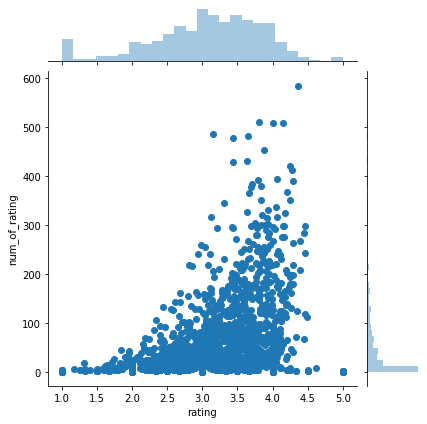

In [19]:
sns.jointplot('rating','num_of_rating',data=tr,kind='scatter')

**Except one or two outliers we can see a trend of high number of rating movies have high number of ratings**

# **Create recommendation for differenet movies**

So, we need to create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. We will get a lot of NaN values, because most people have not seen most of the movies.

In [20]:
mmatrix=data.pivot_table(index='user_id',columns='title',values='rating')
mmatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
mmatrix.shape

(944, 1664)

In [22]:
corrmat=pd.DataFrame()


In [23]:
c=0
for i in mmatrix.columns:
  corrmat[mmatrix.columns[c]]=mmatrix.corrwith(mmatrix[mmatrix.columns[c]])
  c=c+1
  if(c%100==0): 
    print(c)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [24]:
corrmat['num_of_rating']=tr['num_of_rating']
corrmat.head()

,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994),num_of_rating
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.981981,0.866025,NaN,NaN,0.571772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.867722,NaN,NaN,NaN,-0.034483,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,-0.866025,NaN,NaN,NaN,NaN,NaN,NaN,-0.132453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.981981,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.188982,NaN,NaN,0.995871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN,5
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,0.522233,NaN,1.0,NaN,NaN,0.398783,0.236350,-0.147491,0.094964,NaN,0.195058,-0.094832,NaN,0.242363,-0.135467,-0.263889,0.000000,0.192703,NaN,0.531490,NaN,NaN,0.221943,0.75,-0.645497,0.132116,0.385118,0.326669,0.883883,-0.5,...,0.000000,NaN,NaN,NaN,-0.219265,NaN,0.0,0.257404,0.105261,NaN,NaN,0.575224,0.880705,-0.101371,1.0,1.000000,0.714832,1.000000,NaN,0.366592,0.219445,NaN,0.969458,NaN,-1.000000,NaN,NaN,-0.002382,0.042025,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN,109
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,0.635698,NaN,NaN,NaN,1.0,-0.163455,0.045374,-0.243775,-0.045596,1.0,0.000000,0.867722,NaN,0.020207,0.343750,0.450000,0.794719,0.266966,1.000000,0.420304,NaN,-0.097129,0.228031,0.00,0.042640,0.651377,0.030291,-0.226871,NaN,NaN,...,0.677908,NaN,NaN,0.707107,0.264693,NaN,0.0,0.265786,0.149164,NaN,NaN,0.098473,-0.167860,0.284898,Na

Below code will generate 10 random movies of a movie from the data

# **Final movie recommender system**

Give a movie name in the form below then it will recommend you some similar movie. If the Name of the movie field is blank then it will pick recommendation for a random movie

In [30]:
#@title Enter a movie name or it will choose a random movie and suggest similar movie to that
Name_of_the_movie = "Star Wars (1977)" #@param {type:"string"}
i=0
x=100000
for c in corrmat.columns:
  if corrmat.columns[i]==Name_of_the_movie:
    x=i
    break
  i=i+1
if x==100000:
  x=np.random.choice(range(1,1664))
  print("Didn't find the exact match. So suggesting you a random movie and simimar movies")
temp1=corrmat[corrmat.columns[x]].sort_values(ascending=False)
temp2=pd.DataFrame(temp1)
#temp2['num_of_ratings']=corrmat['num_of_rating']
temp2=temp2.join(corrmat['num_of_rating'])
temp2=temp2.join(tr['rating'])
temp2.dropna(inplace=True)
print("Movie name:",mmatrix.columns[x])
print("5 related movies with ratings are: \n")
temp3=temp2[temp2['num_of_rating']>100]

if temp3.shape[0]==0:
  print("There is no similar movies found in the datadase")
else:
  print(temp3['rating'].head(5))
    

Movie name: Star Wars (1977)
5 related movies with ratings are: 

title
Star Wars (1977)                                      4.359589
Empire Strikes Back, The (1980)                       4.206522
Return of the Jedi (1983)                             4.007890
Raiders of the Lost Ark (1981)                        4.252381
Austin Powers: International Man of Mystery (1997)    3.246154
Name: rating, dtype: float64
